In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('verizon.txt', header=0, sep='\t')
data

,Time,Group
0,17.50,ILEC
1,2.40,ILEC
2,0.00,ILEC
3,0.65,ILEC
4,22.23,ILEC
...,...,...
1682,22.13,CLEC
1683,18.57,CLEC
1684,20.00,CLEC
1685,14.13,CLEC


In [3]:
data.Group.value_counts()

ILEC    1664
CLEC      23
Name: Group, dtype: int64

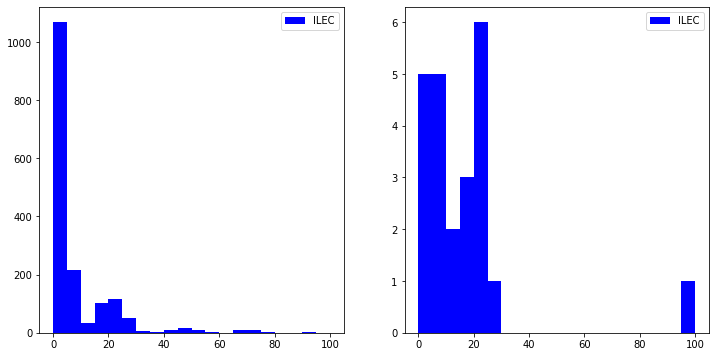

In [4]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(data[data.Group == 'ILEC'].Time, bins=20, color='b', range=(0,100), label='ILEC')
plt.legend()
plt.subplot(1,2,2)
plt.hist(data[data.Group == 'CLEC'].Time, bins=20, color='b', range=(0,100), label='ILEC')
plt.legend()

#   Bootstrap

In [5]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_interval(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

#   Интервальная оценка медианы

In [6]:
ilec_time = data[data.Group == 'ILEC'].Time.values
clec_time = data[data.Group == 'CLEC'].Time.values

In [7]:
np.random.seed(0)
ilec_median_scores = list(map(np.median, get_bootstrap_samples(ilec_time, 1000)))
clec_median_scores = list(map(np.median, get_bootstrap_samples(clec_time, 1000)))
print(f'95% confidence interval for ILEC: {stat_interval(list(ilec_median_scores), .05)}')
print(f'95% confidence interval for CLEC: {stat_interval(list(clec_median_scores), .05)}')

95% confidence interval for ILEC: [3.18    3.82525]
95% confidence interval for ILEC: [ 5.79125 20.     ]


In [8]:
#   Точечная оценка разности медиан
print(f'Diff: {np.median(ilec_time) - np.median(clec_time)}')

Diff: -10.74


In [9]:
#   Интервальная оценка разности медиан как в bootstrap
delta_mean = list(map(lambda x: x[1] - x[0], zip(ilec_median_scores, clec_median_scores)))
print(f"{stat_interval(delta_mean, .05)}")

[ 2.04975 16.63   ]
